# Predicting Airbnb Prices
## Author: Carmen Nguyen

# Project Goal

This project aims to build an effective model to predict the price of Airbnb listings with a variety of factors. Different machine learning models are built and tuned in order to choose the best-performing model.

# Data Source
Data is obtained from this website: https://insideairbnb.com/get-the-data/

# 1. Data Pre-processing

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import warnings
warnings.simplefilter('ignore')

In [2]:
# Import the dataset

data = pd.read_csv('detailed_listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,NaN,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,...,4.91,5.00,4.55,Pending Application,f,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,NaN,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,...,4.99,4.76,4.87,STR-0007772,f,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,NaN,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,...,4.72,4.36,4.47,STR-0001599,f,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,NaN,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,...,4.92,4.85,4.60,NaN,f,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,NaN,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,...,5.00,4.50,4.50,NaN,f,1,1,0,0,0.02


In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8056 non-null   int64  
 1   listing_url                                   8056 non-null   object 
 2   scrape_id                                     8056 non-null   int64  
 3   last_scraped                                  8056 non-null   object 
 4   source                                        8056 non-null   object 
 5   name                                          8056 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5613 non-null   object 
 8   picture_url                                   8056 non-null   object 
 9   host_id                                       8056 non-null   i

There are columns with 0 or too few observations. We will drop those.

In [4]:
# Drop columns with few records
data = data.dropna(axis=1, thresh=6)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8056 non-null   int64  
 1   listing_url                                   8056 non-null   object 
 2   scrape_id                                     8056 non-null   int64  
 3   last_scraped                                  8056 non-null   object 
 4   source                                        8056 non-null   object 
 5   name                                          8056 non-null   object 
 6   neighborhood_overview                         5613 non-null   object 
 7   picture_url                                   8056 non-null   object 
 8   host_id                                       8056 non-null   int64  
 9   host_url                                      8056 non-null   o

Now, we will retain only variables of interest.

In [5]:
data.drop(['id','listing_url','scrape_id','last_scraped','source', 'name','neighborhood_overview',
            'picture_url','host_id','host_url','host_name','host_about','host_thumbnail_url',
            'host_picture_url','host_neighbourhood','host_total_listings_count',
            'host_verifications','neighbourhood','latitude', 'longitude', 'amenities', 'property_type',
            'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
            'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'has_availability','availability_30','availability_60','availability_90',
            'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d',
            'first_review','last_review','license','calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms','reviews_per_month'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   8055 non-null   object 
 1   host_location                6464 non-null   object 
 2   host_response_time           6747 non-null   object 
 3   host_response_rate           6747 non-null   object 
 4   host_acceptance_rate         7170 non-null   object 
 5   host_is_superhost            7992 non-null   object 
 6   host_listings_count          8055 non-null   float64
 7   host_has_profile_pic         8055 non-null   object 
 8   host_identity_verified       8055 non-null   object 
 9   neighbourhood_cleansed       8056 non-null   object 
 10  room_type                    8056 non-null   object 
 11  accommodates                 8056 non-null   int64  
 12  bathrooms_text               8047 non-null   object 
 13  beds              

In [6]:
# Drop NA values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 0 to 7967
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   4314 non-null   object 
 1   host_location                4314 non-null   object 
 2   host_response_time           4314 non-null   object 
 3   host_response_rate           4314 non-null   object 
 4   host_acceptance_rate         4314 non-null   object 
 5   host_is_superhost            4314 non-null   object 
 6   host_listings_count          4314 non-null   float64
 7   host_has_profile_pic         4314 non-null   object 
 8   host_identity_verified       4314 non-null   object 
 9   neighbourhood_cleansed       4314 non-null   object 
 10  room_type                    4314 non-null   object 
 11  accommodates                 4314 non-null   int64  
 12  bathrooms_text               4314 non-null   object 
 13  beds                   

Now, let's handle some datetime and categorical variables in the dataset.

First, with variable `host_since`, we will create a new variable that calculates the total number of days since hosting.

In [7]:
# Convert 'host_since' column to datetime
data['host_since'] = pd.to_datetime(data['host_since'])

# Calculate the difference between 'host_since' date and today's date
data['days_since_hosting'] = (datetime.now() - data['host_since']).dt.days

# Display the DataFrame with the new column
print(data[['host_since', 'days_since_hosting']])

     host_since  days_since_hosting
0    2011-05-31                4720
1    2012-05-08                4377
2    2012-05-19                4366
3    2012-02-01                4474
5    2013-05-16                4004
...         ...                 ...
7924 2014-10-24                3478
7925 2022-11-22                 527
7936 2023-11-11                 173
7948 2011-12-23                4514
7967 2014-01-15                3760

[4314 rows x 2 columns]


Next, we will create a new dummy variable that captures whether the host is located in San Francisco or not.

In [8]:
# Create a new column 'host_in_sf' and set it to 1 if 'host_location' is 'San Francisco, CA', otherwise 0
data['host_in_sf'] = (data['host_location'] == 'San Francisco, CA').astype(int)

# Display the DataFrame with the new column
print(data[['host_location', 'host_in_sf']])

          host_location  host_in_sf
0     San Francisco, CA           1
1     San Francisco, CA           1
2     San Francisco, CA           1
3     San Francisco, CA           1
5           Concord, CA           0
...                 ...         ...
7924  San Francisco, CA           1
7925  San Francisco, CA           1
7936  San Francisco, CA           1
7948  San Francisco, CA           1
7967  San Francisco, CA           1

[4314 rows x 2 columns]


2 variables `host_response_rate` and `host_acceptance_rate` are in the percantage format, so we need to convert them to numerical format.

In [9]:
# Change format to float
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float) / 100
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

Some dummy variables in the dataset take in values of t and f, so we will change them to 0 and 1.

In [10]:
# Change values of dummy variables
data['host_is_superhost'] = data['host_is_superhost'].map({'t': 1, 'f': 0})
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t': 1, 'f': 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

In [11]:
data['bathrooms_text'].unique()

array(['2 baths', '1 shared bath', '1 bath', '1.5 baths',
       '1 private bath', '1.5 shared baths', '0 shared baths',
       '2.5 baths', 'Half-bath', '2 shared baths', '3 baths',
       'Shared half-bath', '3.5 baths', '3 shared baths',
       'Private half-bath', '0 baths', '10 shared baths', '10 baths',
       '4.5 baths', '4 baths', '4 shared baths', '2.5 shared baths',
       '8 shared baths', '5 baths', '5 shared baths', '5.5 baths'],
      dtype=object)

Variable `bathroom_text` has different values indicating the number and type of baths available in a property. We will process this format and create 2 new variables, one for the type (shared or private) and one for the number of bathrooms.

In [12]:
## Define categories
bath_categories = {
    'private_bath': ['bath', 'baths', 'private'],
    'shared_bath': ['shared bath', 'shared baths', 'shared'],}

# Function to categorize bathrooms_text
def categorize_bathrooms(bathroom):
    # Convert the input string to lowercase for case-insensitive matching
    bathroom_lower = bathroom.lower()
    # Split the input string into words
    words = bathroom_lower.split()
    # Iterate through the categories and their keywords
    for category, keywords in bath_categories.items():
        # Check if any keyword is present in the words
        if any(keyword in words for keyword in keywords):
            return category
    # If no match is found, return 'other'
    return 'other'

# Apply categorization to the 'bathrooms_text' column in the DataFrame 'data'
data['bathroom_type'] = data['bathrooms_text'].apply(categorize_bathrooms)

In [13]:
# Function to parse and convert bathroom text to numeric value
def parse_bathroom(text):
    if 'half' in text.lower():
        return 0.5
    elif 'shared' in text.lower():
        return 0
    else:
        return float(text.split()[0])

# Apply the function to the 'bathrooms_text' column
data['bathrooms'] = data['bathrooms_text'].apply(parse_bathroom)

Next, we encode categorical variables `room_type`, `bathroom_type`, and `neighbourhood_cleansed`.

In [14]:
# One-hot encode 'room_type'
data = pd.get_dummies(data, columns=['room_type'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['bathroom_type'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['neighbourhood_cleansed'], drop_first=True, dtype=int)

Variable `host_response_time` is an ordinal categorical data, so we will apply the ordical categorization on it.

In [15]:
# Define the order of categories
response_time_order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

# Convert 'host_response_time' to categorical with specified order
data['host_response_time'] = pd.Categorical(data['host_response_time'], categories=response_time_order, ordered=True)

# Encode 'host_response_time' using label encoding
data['host_response_time_encoded'] = data['host_response_time'].cat.codes

The outcome variable `price` is not yet in the right format for data analysis. Let us process it so that it takes the numeric form.

In [16]:
# Remove '$' and ',' characters and convert to float
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

Finally, let's drop the variables that are already encoded or have another variable created.

In [17]:
data.drop(['host_since','host_location','host_response_time','bathrooms_text'], axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 0 to 7967
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            4314 non-null   float64
 1   host_acceptance_rate                          4314 non-null   float64
 2   host_is_superhost                             4314 non-null   int64  
 3   host_listings_count                           4314 non-null   float64
 4   host_has_profile_pic                          4314 non-null   int64  
 5   host_identity_verified                        4314 non-null   int64  
 6   accommodates                                  4314 non-null   int64  
 7   beds                                          4314 non-null   float64
 8   price                                         4314 non-null   float64
 9   minimum_nights                                4314 non-null   int64 

After data pre-processing, we have a dataset of 64 columns and 4314 entries.

# 2. Exploratory Data Analysis (EDA)

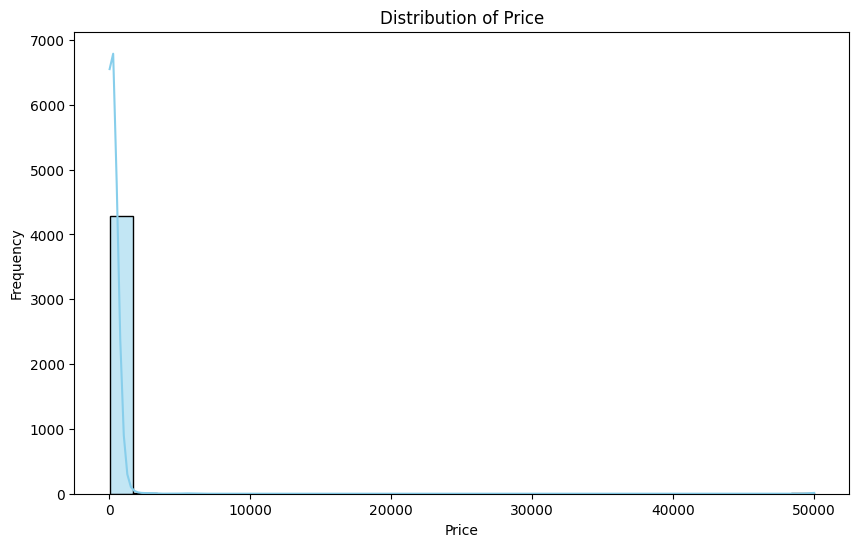

In [19]:
# Plot the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The outcome variable `price` is highly skewed. Let's try log-transforming it.

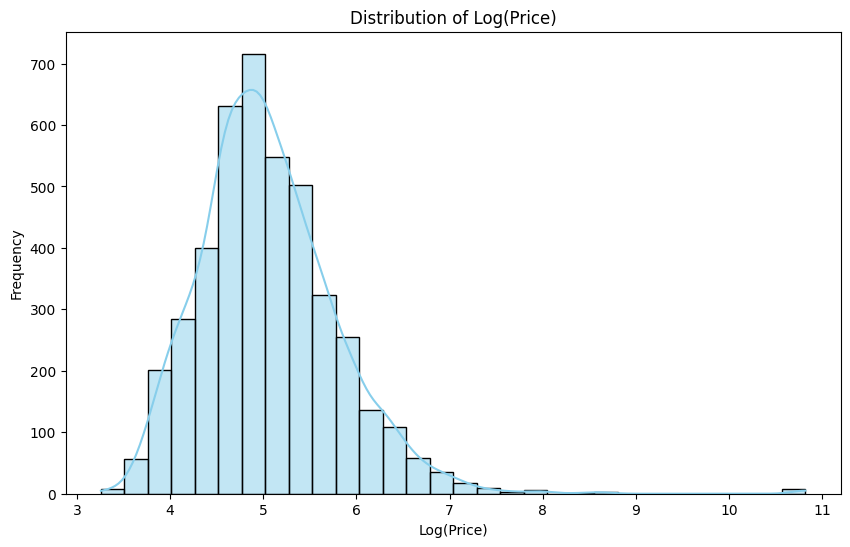

In [20]:
# Plot the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['price']), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

After the log transformation, we can see that `price` is much more normally distributed. We will use log(price) for our analysis.

Next, let's see the distribution of the continuous independent variables.

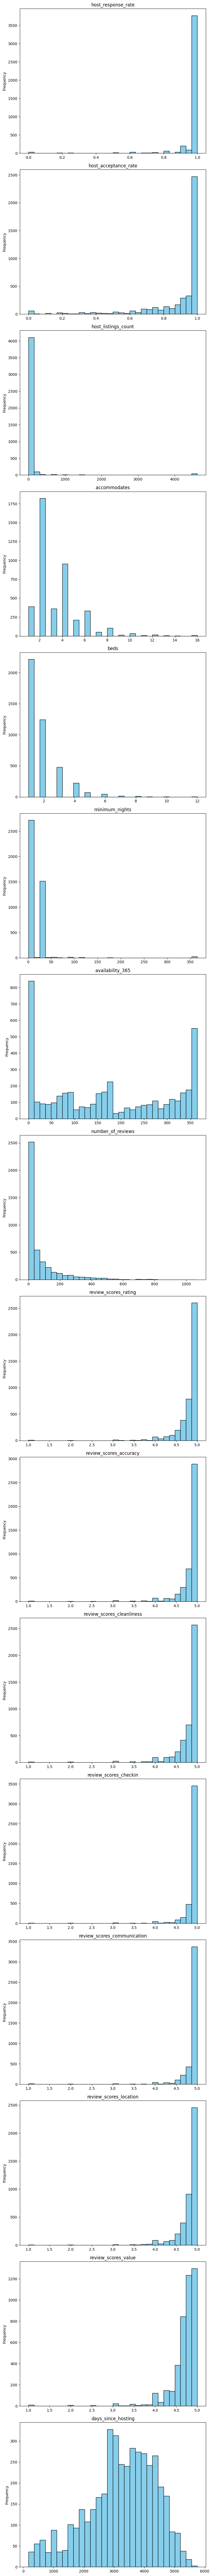

In [21]:
# List of variables to plot
variables = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
             'accommodates', 'beds', 'minimum_nights', 'availability_365',
             'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location',
             'review_scores_value', 'days_since_hosting']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 6 * len(variables)))

# Plot histograms for each variable
for i, variable in enumerate(variables):
    axes[i].hist(data[variable].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the above graphs, they are not very normally distributed. We will have to transform them before performing dimensionality reduction.

# 3. Data Manipulation

First, we split the data into training and testing sets.

In [22]:
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3019, 63) (3019,)
Testing set shape: (1295, 63) (1295,)


Then, log transform the outcome variable and apply Box-Cox tranformation to the independent variables.

In [23]:
# Log transform the outcome variable
y_train = np.log(y_train)
y_test = np.log(y_test)

In [24]:
# Apply Box-Cox transformation to each variable
for variable in variables:
    # Add a small constant to avoid division by zero
    X_train[variable] = X_train[variable].apply(lambda x: x + 0.001 if x == 0 else x)
    X_test[variable] = X_test[variable].apply(lambda x: x + 0.001 if x == 0 else x)

    # Perform Box-Cox transformation
    X_train[variable], _ = boxcox(X_train[variable])
    X_test[variable], _ = boxcox(X_test[variable])

Let's also standardize the predictor variables before dimensionality reduction.

In [25]:
# Standardize the predictor variables
scaler = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
X_train_std = X_train.copy()
X_train_std[variables] = scaler.fit_transform(X_train[variables])
display(X_train_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
X_test_std = X_test.copy()
X_test_std[variables] = scaler.transform(X_test[variables])
display(X_test_std.describe())

                                         Standardardization on Training set                                         


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,beds,minimum_nights,availability_365,...,neighbourhood_cleansed_Presidio,neighbourhood_cleansed_Presidio Heights,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Seacliff,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,host_response_time_encoded
count,3.019000e+03,3.019000e+03,3019.000000,3.019000e+03,3019.000000,3019.000000,3.019000e+03,3.019000e+03,3.019000e+03,3.019000e+03,...,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000
mean,1.023803e-16,-2.235891e-17,0.625704,7.649102e-17,0.999338,0.929778,-6.707674e-17,2.000534e-17,2.588927e-17,-1.406258e-16,...,0.001325,0.004306,0.024180,0.001325,0.063597,0.008943,0.011262,0.018549,0.069891,0.350116
std,1.000166e+00,1.000166e+00,0.484021,1.000166e+00,0.025734,0.255563,1.000166e+00,1.000166e+00,1.000166e+00,1.000166e+00,...,0.036382,0.065490,0.153634,0.036382,0.244074,0.094161,0.105541,0.134949,0.255005,0.670531
min,-3.502317e+00,-2.583637e+00,0.000000,-1.189262e+00,0.000000,0.000000,-1.966134e+00,-9.358206e-01,-1.287818e+00,-1.920132e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.945270e-01,-4.458213e-01,0.000000,-1.189262e+00,1.000000,1.000000,-5.890686e-01,-9.358206e-01,-6.069151e-01,-5.247958e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.945270e-01,5.265480e-01,1.000000,2.789502e-02,1.000000,1.000000,-5.890686e-01,-9.358206e-01,-2.580465e-01,3.271205e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.945270e-01,7.308308e-01,1.000000,7.343616e-01,1.000000,1.000000,6.723304e-01,7.021460e-01,1.191418e+00,8.676652e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.945270e-01,7.308308e-01,1.000000,2.048246e+00,1.000000,1.000000,2.886175e+00,2.087867e+00,2.077761e+00,1.022698e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000



                                          Standardardization on Testing set                                          


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,beds,minimum_nights,availability_365,...,neighbourhood_cleansed_Presidio,neighbourhood_cleansed_Presidio Heights,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Seacliff,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,host_response_time_encoded
count,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,...,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000
mean,-0.059848,-0.080137,0.626255,0.012503,0.999228,0.922008,0.060178,0.026040,0.142699,0.094329,...,0.000772,0.005405,0.035521,0.001544,0.054054,0.005405,0.008494,0.012355,0.08417,0.386100
std,1.217023,1.140470,0.483984,1.015304,0.027789,0.268263,1.069464,1.019668,1.092517,1.021042,...,0.027789,0.073351,0.185165,0.039284,0.226212,0.073351,0.091807,0.110508,0.27775,0.717926
min,-4.887995,-3.148748,0.000000,-1.189262,0.000000,0.000000,-1.966134,-0.935821,-1.287818,-1.908309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.394527,-0.481388,0.000000,-1.189262,1.000000,1.000000,-0.570108,-0.935821,-0.594121,-0.365800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.394527,0.525609,1.000000,0.033067,1.000000,1.000000,-0.570108,-0.935821,-0.227669,0.406587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.394527,0.730831,1.000000,0.817157,1.000000,1.000000,0.744562,0.724130,1.404548,0.971247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,0.394527,0.730831,1.000000,2.107409,1.000000,1.000000,3.148526,2.089031,2.542663,1.161965,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000


# 4. Feature Extraction/Selection using PCA

We want to our components to capture 90% of the variance.

In [26]:
# Applying PCA function on training
# and testing set of X component
pca = PCA(0.9)

pca.fit(X_train_std)

PCA(n_components=0.9)

In [27]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [28]:
pca.n_components_

16

So, 16 components are needed for us to retain 90% of variance. We are able to reduce from 64 dimensions to 16 components.

Now, let's apply `transform` on both the training and testing sets to generate a transformed dataset from the parameters generated from the `fit` method.

In [29]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 5. Predictive Modelling

First, let's write a function to evaluate each model we will be building.

In [30]:
def evaluate(model, X_train, X_test, y_train, y_test, method):

  start_time = time.time()

  # Fit the model 
  model.fit(X_train, y_train)

  # Make predictions
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  # Calculate R-squared for training set
  train_r2 = r2_score(y_train, train_pred)

  # Calculate R-squared for testing set
  test_r2 = r2_score(y_test, test_pred)

  # Calculate RMSE for training set
  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

  # Calculate RMSE for testing set
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  # Calculate execution time
  end_time = time.time()
  execution_time = end_time - start_time
  print(f"Execution time: {execution_time} seconds")

  # Show results
  print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
  print('\nR2-Score on Training set --->', train_r2)
  print('Root Mean Squared Error (RMSE) on Training set --->', train_rmse)

  print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
  print('\nR2-Score on Testing set --->', test_r2)
  print('Root Mean Squared Error (RMSE) on Testing set --->', test_rmse)

  # Plot predictions and actual values
  plt.scatter(y_test, test_pred)
  plt.title(f'Actual vs. Predicted ({method})')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  p1 = max(max(test_pred), max(y_test))
  p2 = min(min(test_pred), min(y_test))
  plt.plot([p1, p2], [p1, p2], linestyle='--', color='red')

  plt.show()

## 5.1. Multiple Linear Regression

Execution time: 0.005686044692993164 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.5647204666086894
Root Mean Squared Error (RMSE) on Training set ---> 0.47469797474294056

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -1.405896603602983
Root Mean Squared Error (RMSE) on Testing set ---> 1.2526603581580689


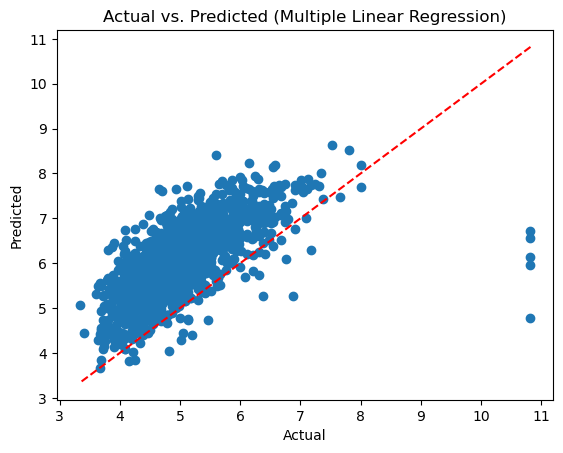

In [31]:
MLR = LinearRegression()

# Evaluate the results
evaluate(MLR, X_train_pca, X_test_pca, y_train, y_test, 'Multiple Linear Regression')

## 5.2. K-Nearest Neighbors (KNN)

Execution time: 0.0903940200805664 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7202548145056303
Root Mean Squared Error (RMSE) on Training set ---> 0.38055248798575136

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.33054800816931074
Root Mean Squared Error (RMSE) on Testing set ---> 0.6607764759034024


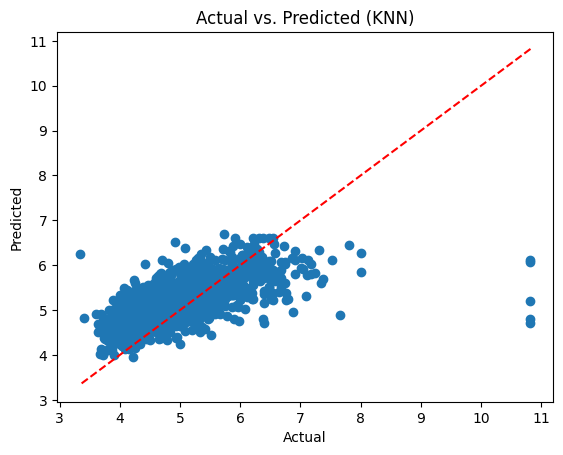

In [31]:
KNN = KNeighborsRegressor()

# Evaluate the results
evaluate(KNN, X_train_pca, X_test_pca, y_train, y_test, 'KNN')

In [42]:
# Create a set of candidate hyperparameters
knn_parameters = [{'n_neighbors': np.arange(2, 50, 1), 'weights': ['uniform','distance']}]

# Search for best hyperparameters
knn_reg = GridSearchCV(KNN, param_grid=knn_parameters, scoring='neg_mean_squared_error', cv=10).fit(X_train_pca, y_train)

# Show best hyperparameters
print(knn_reg.best_params_)

{'n_neighbors': 13, 'weights': 'distance'}


Execution time: 0.05291414260864258 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999024942451958
Root Mean Squared Error (RMSE) on Training set ---> 0.007104743108874916

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.34080769665920174
Root Mean Squared Error (RMSE) on Testing set ---> 0.6556935602295584


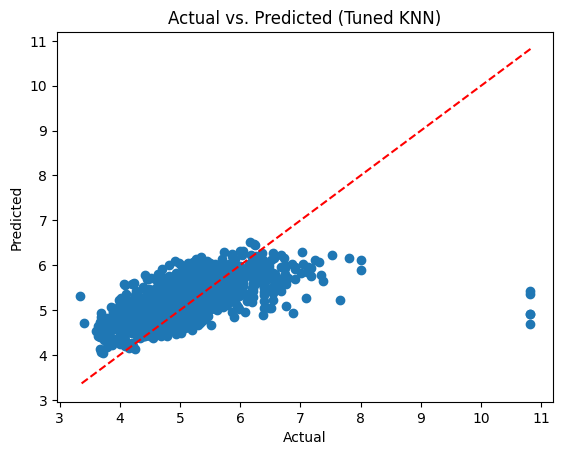

In [43]:
# Fit with tuned hyperparameters
tuned_KNN = KNeighborsRegressor(n_neighbors=13, weights='distance')

# Show the results
evaluate(tuned_KNN, X_train_pca, X_test_pca, y_train, y_test, 'Tuned KNN')


## 5.3. Random Forest

Execution time: 2.4288508892059326 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9446439741999956
Root Mean Squared Error (RMSE) on Training set ---> 0.1692839198256509

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.049142304549072646
Root Mean Squared Error (RMSE) on Testing set ---> 0.7875037258457033


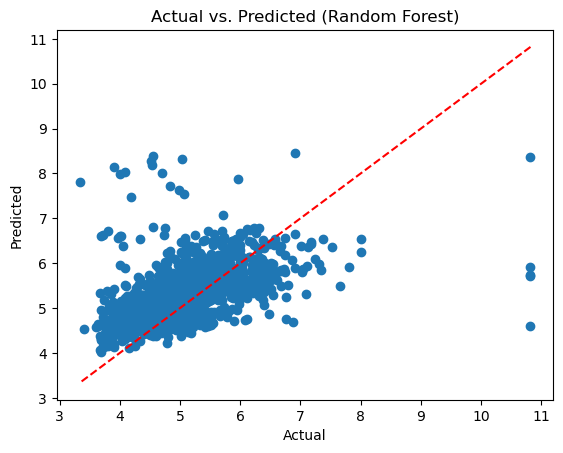

In [35]:
# Initialize the RandomForestRegressor
RF = RandomForestRegressor(random_state=42)

# Show results
evaluate(RF, X_train_pca, X_test_pca, y_train, y_test, 'Random Forest')

In [36]:
# Create a set of candidate hyperparameters
rf_parameters = {'bootstrap': [True, False],
                'max_depth': [10, 20, 30, None],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 7],
                'n_estimators': [200, 400]}

# Search for best hyperparameters
RF_random = RandomizedSearchCV(RF, param_distributions=rf_parameters, cv=10, random_state=42).fit(X_train_pca, y_train)

# Show best hyperparameters
print(RF_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


Execution time: 8.290157079696655 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8951594842967386
Root Mean Squared Error (RMSE) on Training set ---> 0.2329688358147173

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.30456433570169794
Root Mean Squared Error (RMSE) on Testing set ---> 0.6734778765017337


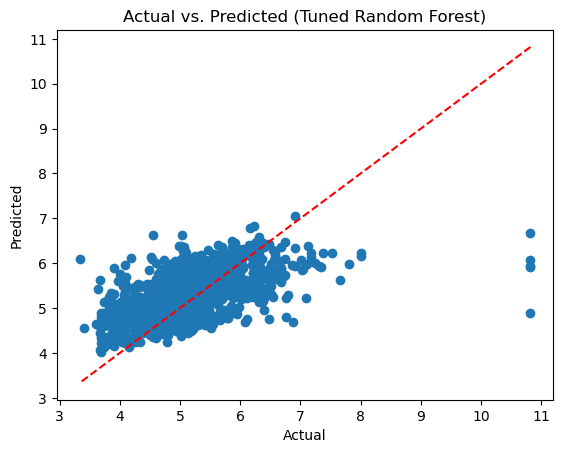

In [37]:
# Show results with tuned parameters
best_random = RF_random.best_estimator_
evaluate(best_random, X_train_pca, X_test_pca, y_train, y_test, 'Tuned Random Forest')

## 5.4. Decision Tree

Execution time: 0.042447805404663086 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999024942452274
Root Mean Squared Error (RMSE) on Training set ---> 0.007104743107727235

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -1.437522018516403
Root Mean Squared Error (RMSE) on Testing set ---> 1.2608665638680863


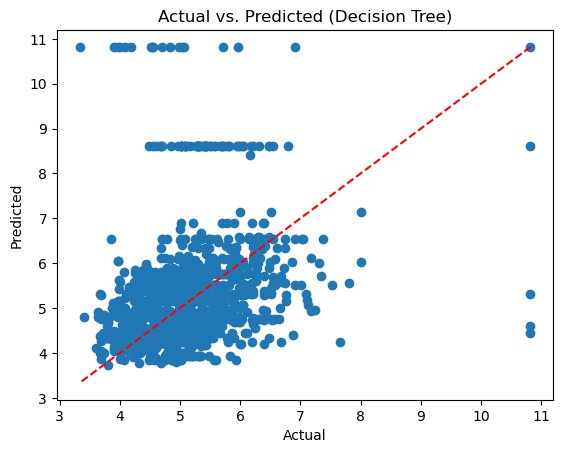

In [38]:
# Initialize the model
DT = DecisionTreeRegressor(random_state=42)

# Show results
evaluate(DT, X_train_pca, X_test_pca, y_train, y_test, 'Decision Tree')

In [39]:
# Hyperparameter range intialization for tuning
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[10,20,30,40] }


# Define and fit the model
decision_tree = GridSearchCV(DT, param_grid=parameters,scoring='neg_mean_squared_error', cv=10)
decision_tree.fit(X_train_pca, y_train)

decision_tree.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

Execution time: 0.012331962585449219 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.3976760859287296
Root Mean Squared Error (RMSE) on Training set ---> 0.5584037270686802

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.20797378162169888
Root Mean Squared Error (RMSE) on Testing set ---> 0.71872811450351


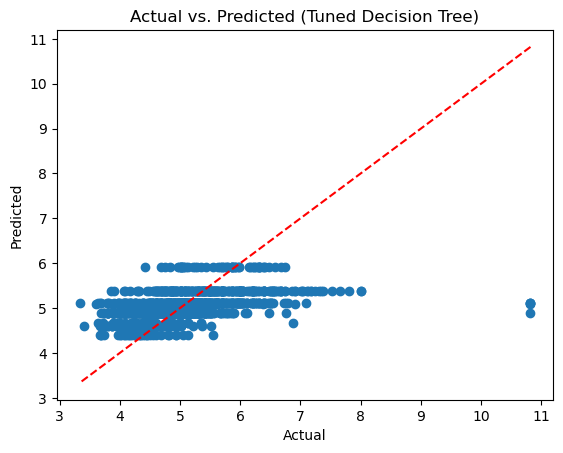

In [40]:
# Show results with tuned parameters
DT_best_grid = decision_tree.best_estimator_
evaluate(DT_best_grid, X_train_pca, X_test_pca, y_train, y_test, 'Tuned Decision Tree')

## 5.5. Gradient Boosting

Execution time: 1.0808031558990479 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7546497220256609
Root Mean Squared Error (RMSE) on Training set ---> 0.356390839286655

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.7937331360581339
Root Mean Squared Error (RMSE) on Testing set ---> 1.0816176608492754


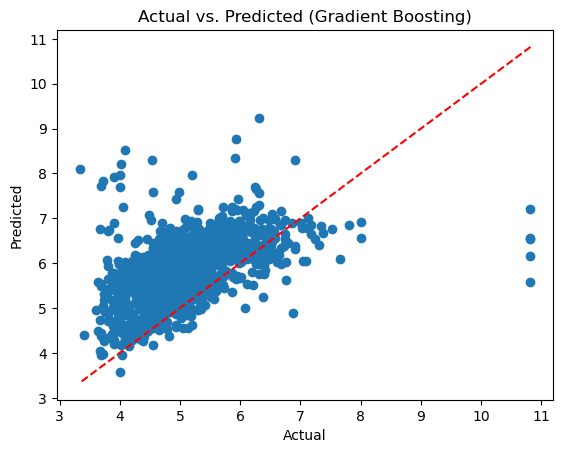

In [41]:
# Initialize the model
GB = GradientBoostingRegressor(random_state=42)

# Show results
evaluate(GB, X_train_pca, X_test_pca, y_train, y_test, 'Gradient Boosting')

In [42]:
# Define the parameter grid
GB_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]}

# Define and fit the model
gradient_boost = GridSearchCV(GB, param_grid=GB_grid, scoring='neg_mean_squared_error', cv=10)
gradient_boost.fit(X_train_pca, y_train)

gradient_boost.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

Execution time: 3.5100269317626953 seconds


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8842059164069094
Root Mean Squared Error (RMSE) on Training set ---> 0.2448366565339117

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.20762442352810084
Root Mean Squared Error (RMSE) on Testing set ---> 0.887484543888093


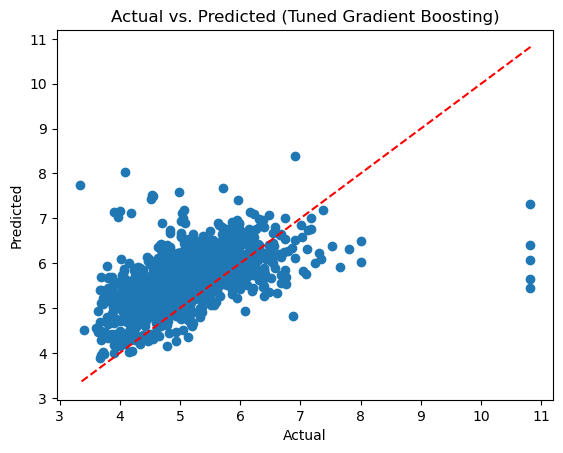

In [43]:
# Show results with tuned parameters
GB_best_grid = gradient_boost.best_estimator_
evaluate(GB_best_grid, X_train_pca, X_test_pca, y_train, y_test, 'Tuned Gradient Boosting')

# 6. Analysis/Evaluation

* Multiple Linear Regression performs poorly on both the training and testing sets, indicating that it is not suitable for this dataset and the relationship we are studying is essentially non-linear. 
* The tuned KNN model seems to perform the best in terms of both predictive accuracy and computational efficiency. It achieves a high R2-score on the testing set (0.341) with a relatively low RMSE (0.656), and it has a short execution time (0.053 seconds), making it suitable for real-time applications.